In [289]:
# !pip install keras   # install keras in code

## 1. Import Packages

In [294]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import model_from_json 

## 2. Load trained model

In [279]:
# Load trained model
json_file = open("5_model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
 
# model weight load 
loaded_model.load_weights("5_weights.h5")
print("Loaded model from disk")

Loaded model from disk


## 3. Prediction with sample image

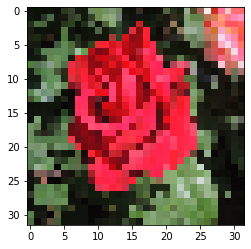

In [290]:
f_name = "test.jpg"
test_image = image.load_img(f_name, target_size = (32,32))
plt.imshow(test_image)
plt.show()

In [283]:
# data preprocessing
test_image = np.array(test_image)
test_image = test_image/255

In [284]:
a_pred = str(loaded_model.predict_classes(test_image.reshape(1,32,32,3)))
o_pred = loaded_model.predict(test_image.reshape(1,32,32,3))
o_pred = np.around(o_pred,3)
pred_100 = o_pred * 100

In [288]:
ind = np.argmax(o_pred, axis = 1)
if o_pred[0,ind] >=0.5 :
    if a_pred == '[0]':
        a_label = 'daisy'
    if a_pred == '[1]':
        a_label = 'dandelion'
    if a_pred == '[2]':
        a_label = 'roses'
    if a_pred == '[3]':
        a_label = 'sunflowers'   
    if a_pred == '[4]':
        a_label = 'tulips'  
        
    print("이 꽃은 " + str(pred_100[0,ind]) + '% 의 확률로 ' + a_label + " 입니당")

이 꽃은 [99.7]% 의 확률로 tulips 입니당


In [292]:
print(o_pred)
print("Prediction of an image :", a_label)

[[0.    0.    0.002 0.    0.997]]
Prediction of an image : tulips
